In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

from models import *
from utils import *

# Data

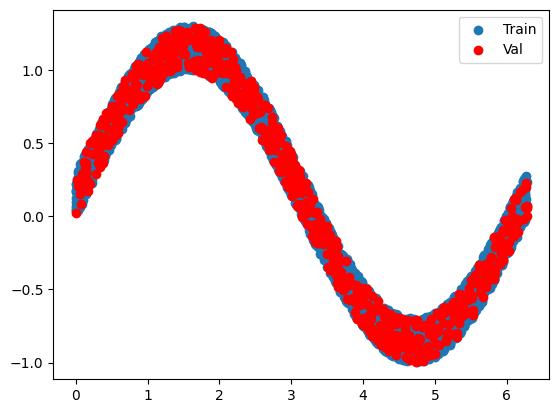

In [2]:
X = torch.rand(5000)*2*torch.pi
Y = torch.sin(X) + torch.rand(5000)*0.3

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Val', c='red')
plt.legend()

In [3]:
X_train, X_test, y_train, y_test = X_train.view(-1, 1), X_test.view(-1, 1), y_train.view(-1, 1), y_test.view(-1, 1)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True, drop_last=True)

# Deep ensemble

In [4]:
base_model_1 = MLP() 
optimizer = torch.optim.Adam(base_model_1.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_1, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_2 = MLP() 
optimizer = torch.optim.Adam(base_model_2.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_2, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_3 = MLP() 
optimizer = torch.optim.Adam(base_model_3.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_3, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

base_model_4 = MLP() 
optimizer = torch.optim.Adam(base_model_4.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(base_model_4, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=49)

Epoch: 49 :::: Train loss 0.008498875424265862 :::: Val loss 0.007707527372986078 

Epoch: 98 :::: Train loss 0.007845357991755009 :::: Val loss 0.007731705438345671 

Epoch: 49 :::: Train loss 0.008295097388327122 :::: Val loss 0.007557337637990713 

Epoch: 98 :::: Train loss 0.007983001880347729 :::: Val loss 0.007468017749488354 

Epoch: 49 :::: Train loss 0.00850752368569374 :::: Val loss 0.008709867484867573 

Epoch: 98 :::: Train loss 0.007999859750270844 :::: Val loss 0.007652820087969303 

Epoch: 49 :::: Train loss 0.008079566061496735 :::: Val loss 0.00787541177123785 

Epoch: 98 :::: Train loss 0.007895918563008308 :::: Val loss 0.007618538103997707 



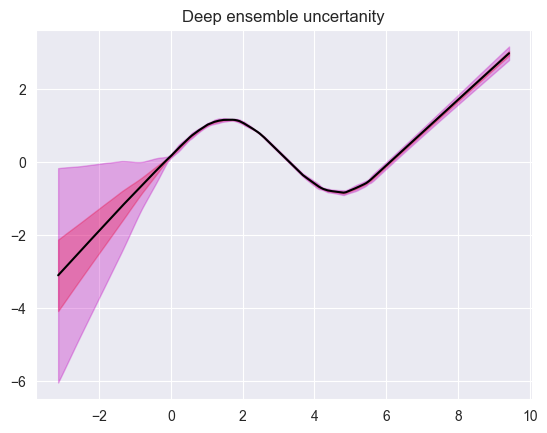

In [5]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = base_model_1(x_plot.to('cuda'))
y_model = torch.cat((y_model,base_model_2(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_3(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_4(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std)

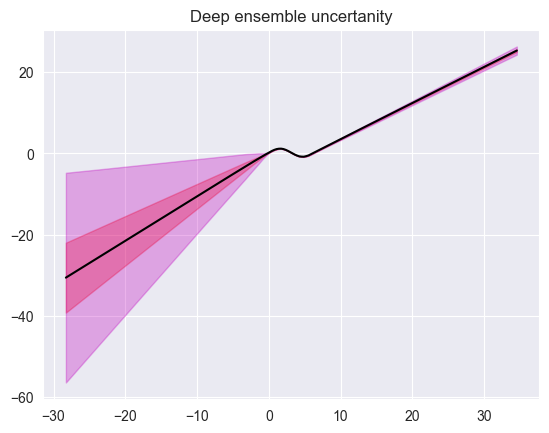

In [6]:
x_plot = torch.linspace(-9*np.pi,11*np.pi,200).view(-1, 1)

y_model = base_model_1(x_plot.to('cuda'))
y_model = torch.cat((y_model,base_model_2(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_3(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_4(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std)

# Masksemble

In [7]:
mask_model = MLP_Maksembles(2,6) 
optimizer = torch.optim.Adam(mask_model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(mask_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss 0.07963939756155014 :::: Val loss 0.07483809441328049 

Epoch: 20 :::: Train loss 0.04429561272263527 :::: Val loss 0.04249490424990654 

Epoch: 30 :::: Train loss 0.028494680300354958 :::: Val loss 0.02678961306810379 

Epoch: 40 :::: Train loss 0.02056732401251793 :::: Val loss 0.019639546051621437 

Epoch: 50 :::: Train loss 0.015151971019804478 :::: Val loss 0.014228437095880508 

Epoch: 60 :::: Train loss 0.011623481288552284 :::: Val loss 0.010698757134377956 

Epoch: 70 :::: Train loss 0.009818513877689838 :::: Val loss 0.009359288960695267 

Epoch: 80 :::: Train loss 0.009024439379572868 :::: Val loss 0.008832519873976707 

Epoch: 90 :::: Train loss 0.008765553124248981 :::: Val loss 0.008378352038562298 

Epoch: 100 :::: Train loss 0.008608891628682613 :::: Val loss 0.009201880544424057 



# Dropout

In [8]:
drop_model = MLP_Dropout() 
optimizer = torch.optim.Adam(drop_model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()
trainer(drop_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss 0.06729181110858917 :::: Val loss 0.043255291879177094 

Epoch: 20 :::: Train loss 0.05012810602784157 :::: Val loss 0.02189425751566887 

Epoch: 30 :::: Train loss 0.040880750864744186 :::: Val loss 0.016577377915382385 

Epoch: 40 :::: Train loss 0.036601580679416656 :::: Val loss 0.014524866826832294 

Epoch: 50 :::: Train loss 0.03689299151301384 :::: Val loss 0.013092057779431343 

Epoch: 60 :::: Train loss 0.03465718403458595 :::: Val loss 0.013433204963803291 

Epoch: 70 :::: Train loss 0.03479583188891411 :::: Val loss 0.01397450640797615 

Epoch: 80 :::: Train loss 0.03390314057469368 :::: Val loss 0.013669631443917751 

Epoch: 90 :::: Train loss 0.030719097703695297 :::: Val loss 0.012659166008234024 

Epoch: 100 :::: Train loss 0.03219488635659218 :::: Val loss 0.012087562121450901 



In [9]:
#Activando dropout en inferencia
drop_model.eval()
for m in drop_model.modules():
  if m.__class__.__name__.startswith('Dropout'):
    m.train()

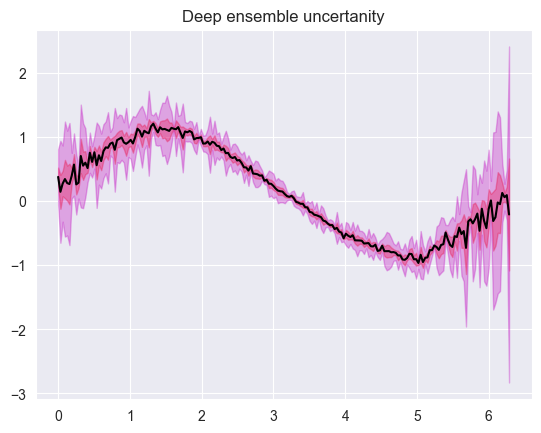

In [10]:
x_plot = torch.linspace(0,2*np.pi,200).view(-1, 1)
N_model = 4

y_model = drop_model(x_plot.to('cuda'))
for i in range(N_model-1):
    y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std)

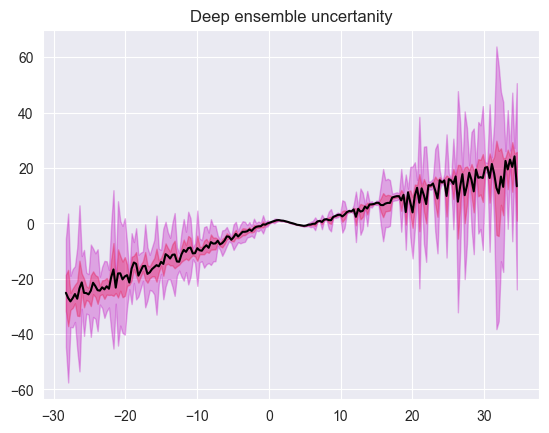

In [11]:
x_plot = torch.linspace(-9*np.pi,11*np.pi,200).view(-1, 1)

y_model = drop_model(x_plot.to('cuda'))
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)

y_mean = torch.mean(y_model,dim=1).cpu().detach().numpy()
y_std = torch.std(y_model,dim=1).cpu().detach().numpy()

plot_uncertanity(x_plot, y_mean, y_std)